In [1]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [2]:
# Read the CSV
heart = pd.read_csv("cleaned_cardio.csv")
heart.head()

,age,height,weight,ap_hi,ap_lo,cardio,BMI,gender_1,gender_2,cholesterol_1,...,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
0,50.0,66.0,136.0,110,80,0,21.948577,0,1,1,...,0,1,0,0,1,0,1,0,0,1
1,55.0,61.0,187.0,140,90,1,35.329481,1,0,0,...,1,1,0,0,1,0,1,0,0,1
2,52.0,65.0,141.0,130,70,1,23.461065,1,0,0,...,1,1,0,0,1,0,1,0,1,0
3,48.0,67.0,180.0,150,100,1,28.188906,0,1,1,...,0,1,0,0,1,0,1,0,0,1
4,48.0,61.0,123.0,100,60,0,23.238108,1,0,1,...,0,1,0,0,1,0,1,0,1,0


In [3]:
y = heart["cardio"]
target_names = ["negative", "positive"]

In [4]:
X = heart.drop("cardio", axis=1)
X.head()

,age,height,weight,ap_hi,ap_lo,BMI,gender_1,gender_2,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
0,50.0,66.0,136.0,110,80,21.948577,0,1,1,0,0,1,0,0,1,0,1,0,0,1
1,55.0,61.0,187.0,140,90,35.329481,1,0,0,0,1,1,0,0,1,0,1,0,0,1
2,52.0,65.0,141.0,130,70,23.461065,1,0,0,0,1,1,0,0,1,0,1,0,1,0
3,48.0,67.0,180.0,150,100,28.188906,0,1,1,0,0,1,0,0,1,0,1,0,0,1
4,48.0,61.0,123.0,100,60,23.238108,1,0,1,0,0,1,0,0,1,0,1,0,1,0


In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

k: 1, Train/Test Score: 0.958/0.631
k: 3, Train/Test Score: 0.810/0.671
k: 5, Train/Test Score: 0.776/0.692
k: 7, Train/Test Score: 0.762/0.700
k: 9, Train/Test Score: 0.752/0.705
k: 11, Train/Test Score: 0.746/0.710
k: 13, Train/Test Score: 0.742/0.710
k: 15, Train/Test Score: 0.740/0.714
k: 17, Train/Test Score: 0.738/0.716
k: 19, Train/Test Score: 0.736/0.717


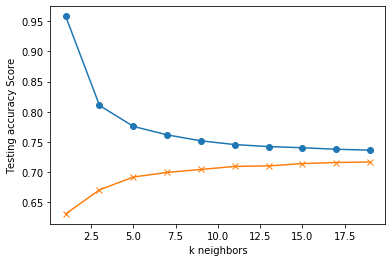

In [6]:
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [7]:
# Note that k: 13 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=13)
knn.fit(X_train, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test, y_test))

k=13 Test Acc: 0.710


In [ ]:
# GridSearch for KNN
from sklearn.model_selection import GridSearchCV

params_knn = {'n_neighbors':[5,6,7,8,9,10],
          'leaf_size':[1,2,3,5],
          'weights':['uniform', 'distance'],
          'algorithm':['auto', 'ball_tree','kd_tree','brute'],
          'n_jobs':[-1]}

grid_knn = GridSearchCV(knn, param_grid = params_knn, n_jobs=-1)
grid_knn.fit(X_train, y_train)
print("Best Hyper Parameters:\n", grid_knn.best_params_)
prediction_knn = grid_knn.predict(X_test)

# Print Accuracy
accuracy_knn = metrics.accuracy_score(prediction_knn, y_test)
print("Accuracy: ", accuracy_knn)

C:\Users\kenda\anaconda\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
